---
title: "ODE Stability"
subtitle: "BMES 678: Programming Assignment"
author: "Tony Kabilan Okeke"
format: PrettyPDF-pdf
---

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import tools

## Fish Population Dynamics with Holling's Type II Harvesting 

Consider the model for a population of fish P(t) given by: 

$$ \frac{dP}{dt} = rP(1-\frac{P}{K}) - \frac{hP}{1+0.05P} $$

Unless noted otherwise, use r=0.5, K=100, h=0.75;


* Draw the phase plot (P vs. dP/dt). Your phase plot should show all equilibrium points. No need to show quiver arrows, the direction of the quivers are obvious from the sign of dP/dt. Mark each of the unstable equilibria with open circles and each of the stable equilibria with closed circles. You may use manual/visual inspection to identify whether a fixed point is stable or unstable and hard-code the open/closed circle drawing of the fixed points.

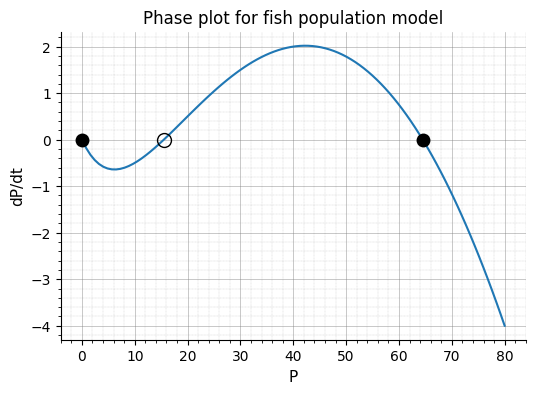

In [2]:
#| fig-align: center
#| fig-cap: Phase plot for fish population model. Stable equilibria are shown as closed black circles, unstable equilibria are shown as open black circles.

# Define ODE
def dPdt(P, h=None, r=None):
    K = 100
    if h is None:
        h = 0.75
    if r is None:
        r = 0.5
    return r*P*(1-P/K) - h*P/(1+0.05*P)

# determine fixed points
P = sp.symbols("P")
sym_dP = dPdt(P)
fixed_pts = sp.solve(sp.Eq(sym_dP, 0), P)
dp_fixed = [dPdt(x) for x in fixed_pts]

# determine stability of fixed points
sym_ddP = sp.diff(sym_dP, P)
is_stable = lambda x: sym_ddP.subs(P, x) < 0  # noqa: E731
stability = [is_stable(x) for x in fixed_pts]

# define vars for phase plot
P = np.linspace(0, 80, 100)
dP = dPdt(P)

# plot
fig, ax = plt.subplots(figsize=(6,4))
tools.style_axis(ax, "P", "dP/dt")
ax.plot(P, dP)
ax.set_title("Phase plot for fish population model")

for x, y, s in zip(fixed_pts, dp_fixed, stability):
    outline = "none" if s else "k"
    fill = "k" if s else "none"
    ax.plot(x, y, fill, marker="o", markersize=10, markeredgecolor=outline)

* Draw the bifurcation diagram with bifurcation parameter h. No need to show quiver arrows. You may find the fixed points analytically or numerically. The diagram must be illustrative of all fixed points in the system. You do not need to identify the type of fixed points.

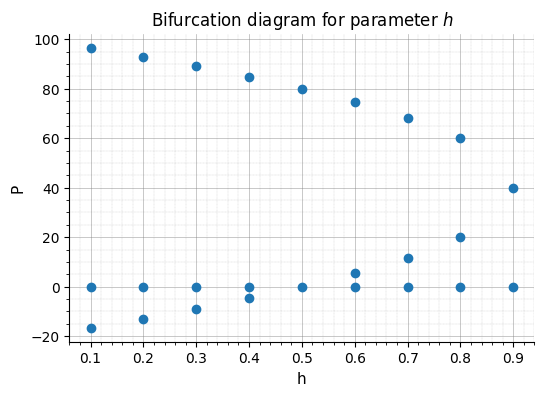

In [3]:
#| fig-align: center
#| fig-cap: Bifurcation diagram for parameter $h$ in fish population model.

P = sp.symbols("P")

h_vals = np.arange(.1, 1, .1)
fixed = [[], []]

for h in h_vals:
    dP = dPdt(P, h=h)
    fpts = sp.solve(sp.Eq(dP, 0), P)
    for fp in fpts:
        if fp.is_real:
            fixed[0].append(fp)
            fixed[1].append(h)

fig, ax = plt.subplots(figsize=(6,4))
tools.style_axis(ax, "h", "P", "Bifurcation Diagram")
ax.set_title("Bifurcation diagram for parameter $h$")
ax.plot(fixed[1], fixed[0], 'o');

* Draw the bifurcation diagram with bifurcation parameter r. No need to show quiver arrows. You may find the fixed points analytically or numerically. The diagram must be illustrative of all fixed points in the system. You do not need to identify the type of fixed points.

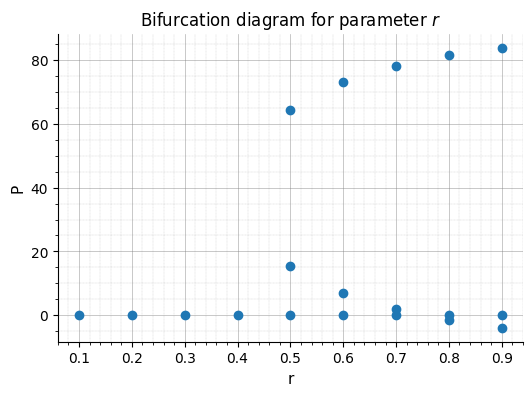

In [4]:
#| fig-align: center
#| fig-cap: Bifurcation diagram for parameter $r$ in fish population model.

P = sp.symbols("P")

r_vals = np.arange(.1, 1, .1)
fixed = [[], []]

for r in r_vals:
    dP = dPdt(P, r=r)
    fpts = sp.solve(sp.Eq(dP, 0), P)
    for fp in fpts:
        if fp.is_real:
            fixed[0].append(fp)
            fixed[1].append(r)

fig, ax = plt.subplots(figsize=(6,4))
tools.style_axis(ax, "r", "P", "Bifurcation Diagram")
ax.set_title("Bifurcation diagram for parameter $r$")
ax.plot(fixed[1], fixed[0], 'o');

* I recommend using an analytical solution of the fixed points, because numeric solutions are not guaranteed to find all fixed points. You can convert a symbolic value to a number using double(). You can use isreal() identify whether a value is real or imaginary. You should only show/plot the real solutions for the fixed points. When a fixed point is imaginary/complex, it should be considered physically non-existent.